In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [9]:
top5 = chipo.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values('quantity', ascending=False).head()
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


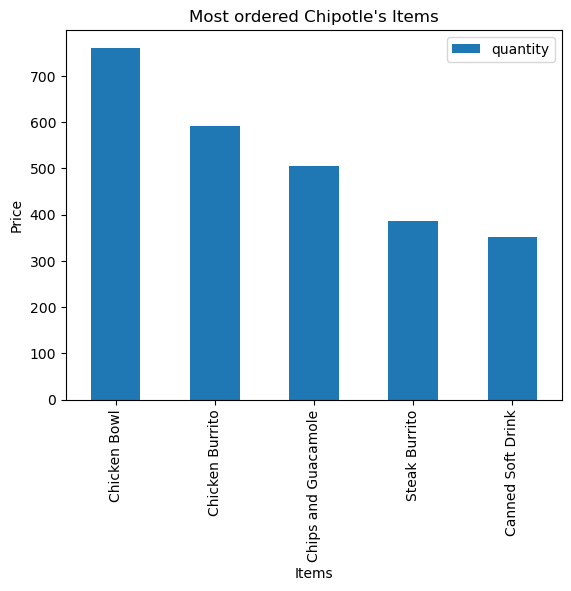

In [20]:
top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

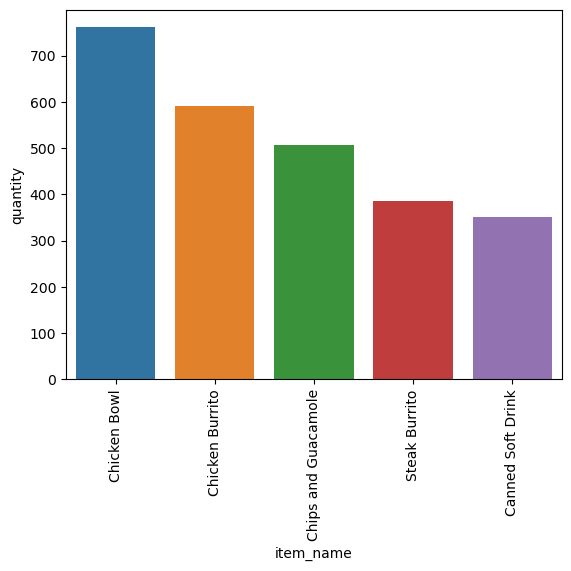

In [14]:
import seaborn as sns
sns.barplot(x='item_name', y='quantity', data=top5.reset_index())
plt.xticks(rotation='vertical')

In [15]:
chipo['price'] = chipo.item_price.str.slice(1).astype(float)
chipo.price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: price, Length: 4622, dtype: float64

<Axes: xlabel='price', ylabel='quantity'>

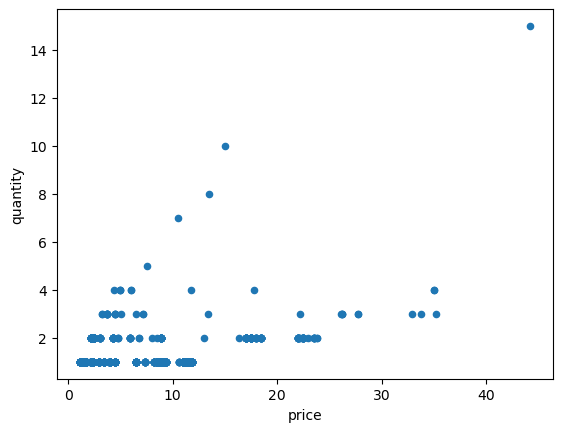

In [16]:
chipo.plot(x='price', y='quantity', kind='scatter')

<Axes: xlabel='price', ylabel='quantity'>

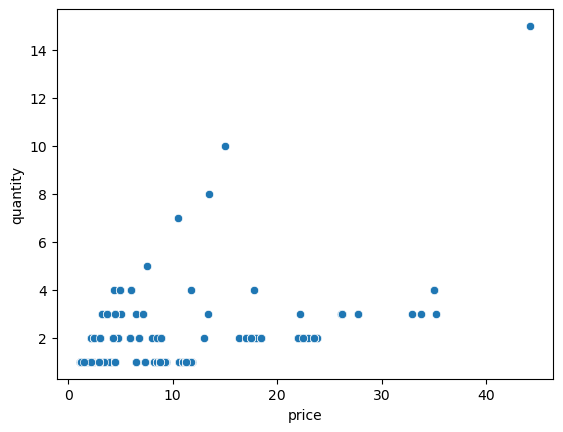

In [18]:
sns.scatterplot(x='price', y='quantity', data=chipo)

In [24]:
orders = chipo.groupby('order_id')[['price', 'quantity']].sum()
orders

,price,quantity
order_id,,
1,11.56,4
2,16.98,2
3,12.67,2
4,21.00,2
5,13.70,2
...,...,...
1830,23.00,2
1831,12.90,3
1832,13.20,2


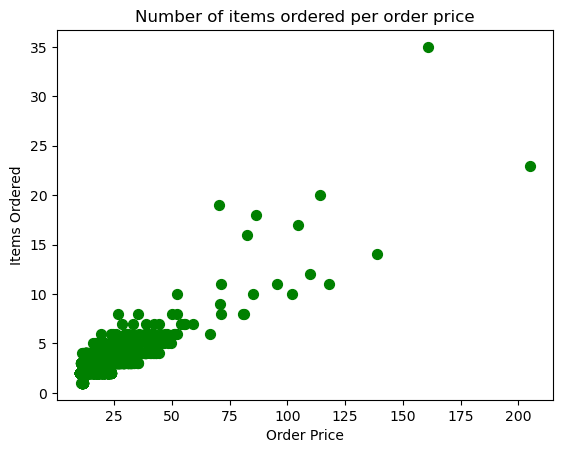

In [29]:
plt.scatter(x=orders.price, y=orders.quantity, s=50, c='green')
plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.title("Number of items ordered per order price")
plt.show()